<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.875 · Deep Learning · PEC2</p>
<p style="margin: 0; text-align:right;">2021-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC2: Redes Neuronales Convolucionales con KERAS

A lo largo de esta práctica vamos a implementar varios modelos de redes neuronales para clasificar las imágenes de la base de datos [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html).

La base de datos CIFAR10 está formada por imágenes en color de dimensiones 32x32 píxels que pertenecen a 10 clases:

- airplane (label 0)
- automobile (label 1)
- bird (label 2)
- cat (label 3)
- deer (label 4)
- dog (label 5)
- frog (label 6)
- horse (label 7)
- ship (label 8)
- truck (label 9)

Esta base de datos está compuesta de 60.000 registros que se dividen a su vez en 2 conjuntos: 50.000 imágenes para el conjunto de entrenamiento y 10.000 imágenes para el conjunto de test.

En el ejercicio llevaremos a cabo la tarea de construir varios modelos con el objetivo de conseguir la mayor precisión al realizar la clasificación de las imágenes. Para ello implementaremos y analizaremos los siguientes modelos: 
​
1. Una red neuronal artificial completamente conectada
2. Una red neuronal convolucional de una capa
3. Una red neuronal convolucional profunda

​
En todos los casos se utilizará la librería Keras con Tensorflow para la implementación del modelo, la compilación y el entrenamiento.

Finalmente, realizaremos una predicción de las imágenes con el mejor modelo implementado.

​
**Importante: Cada uno de los ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en formato notebook y en formato html donde se vea el código y los resultados y comentarios de cada ejercicio. Para exportar el notebook a html puede hacerse desde el menú File $\to$ Download as $\to$ HTML.**

<div class="alert alert-block alert-success">
<strong>Javier Gómez de Diego</strong>
</div>

## 1. Descarga, análisis y pre-procesado de los datos (1,5 puntos)

### 1.1 Descarga de datos
Empezamos importando algunos paquetes para la realización de la práctica y procedemos a descargar el dataset.

In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad
import matplotlib.pyplot as plt
import time
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
# Descarga el dataset CIFAR10 y hace la partición train/test
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### 1.2 Análisis de los datos
<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Representar la dimensión de las variables X_train, y_train, X_test e y_test.

Mostrar las imágenes de los primeros 10 registros del conjunto X_train junto con sus etiquetas en formato texto.

**Nota**: Al ser las imágenes de pequeño tamaño (32x32) se recomienda escalarlas a la hora de representarlas.
</div>

ENTRENAMIENTO		 (50000, 32, 32, 3) 
Nº de imágenes:		 50000 
Tamaño:			 32 x 32  píxeles 
Colores:		 3 

Nº de etiquetas:	 50000 
Diemnsiones etiquetas:	 1 
Clases:			 10


TEST			 (10000, 32, 32, 3) 
Nº de imágenes:		 10000 
Tamaño:			 32 x 32  píxeles 
Colores:		 3 

Nº de etiquetas:	 10000 
Diemnsiones etiquetas:	 1 
Clases:			 10


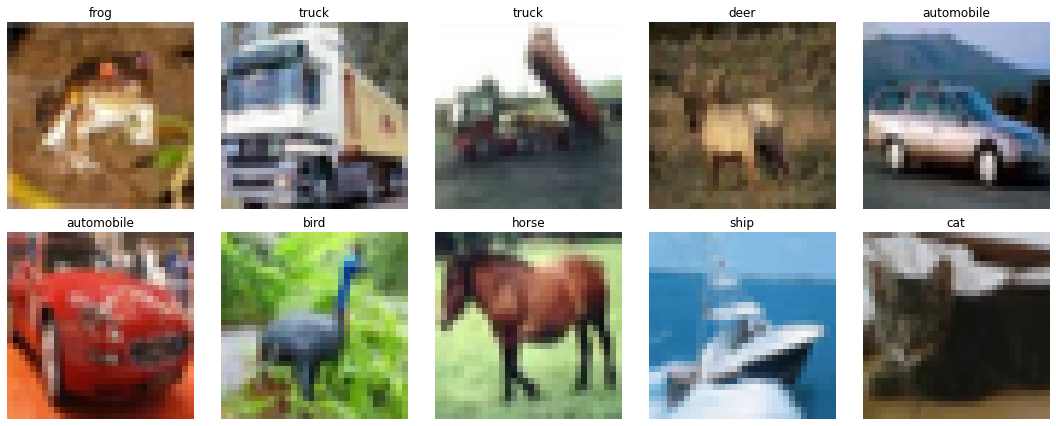

In [3]:
# Análisis del conjunto de datos descargado

# Shapes
print("ENTRENAMIENTO\t\t", X_train.shape,
      "\nNº de imágenes:\t\t", X_train.shape[0],
      "\nTamaño:\t\t\t", X_train.shape[1], "x", X_train.shape[2], " píxeles",
      "\nColores:\t\t", X_train.shape[3],
      "\n\nNº de etiquetas:\t", y_train.shape[0],
      "\nDiemnsiones etiquetas:\t", y_train.shape[1],
      "\nClases:\t\t\t", len(np.unique(y_train)))

print("\n\nTEST\t\t\t", X_test.shape,
      "\nNº de imágenes:\t\t", X_test.shape[0],
      "\nTamaño:\t\t\t", X_test.shape[1], "x", X_test.shape[2], " píxeles",
      "\nColores:\t\t", X_test.shape[3],
      "\n\nNº de etiquetas:\t", y_test.shape[0],
      "\nDiemnsiones etiquetas:\t", y_test.shape[1],
      "\nClases:\t\t\t", len(np.unique(y_test)))

# Crear lista con los nombres de las clases
def stringlabel(y):
    y_str=[]
    for i in y:
        if i==0:
            y_str.append("airplane")
        elif i==1:
            y_str.append("automobile")
        elif i==2:
            y_str.append("bird")
        elif i==3:
            y_str.append("cat")
        elif i==4:
            y_str.append("deer")
        elif i==5:
            y_str.append("dog")
        elif i==6:
            y_str.append("frog")
        elif i==7:
            y_str.append("horse")
        elif i==8:
            y_str.append("ship")
        elif i==9:
            y_str.append("truck")
    return y_str

y_train_str = stringlabel(y_train)
y_test_str = stringlabel(y_test)

# Plot
fig, axis = plt.subplots(2, 5, figsize=(15, 6))
j=0
for i, ax in enumerate(axis):
    for a in ax:
        a.imshow(X_train[j])
        a.set_title(y_train_str[j])
        a.axis('off')
        j=j+1
plt.tight_layout()

### 1.3 Pre-procesado de datos
Dado que las imágenes están en color, vamos a convertirlas a escala de grises para realizar las primeras clasificaciones. Para ello utilizaremos la función `cvtColor` del paquete [OpenCV](https://pypi.org/project/opencv-python/) (cv2)

In [4]:
import cv2

# Convierte X_train y X_test a escala de grises
X_train_grey = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test_grey = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,25 pts.]:</strong> Representar la dimensión de las variables X_train_grey y X_test_grey.

Mostrar las imágenes de los primeros 10 registros del conjunto X_train_grey junto con sus etiquetas en formato texto.
</div>

ENTRENAMIENTO		 (50000, 32, 32) 
Nº de imágenes:		 50000 
Tamaño:			 32 x 32  píxeles


TEST			 (10000, 32, 32) 
Nº de imágenes:		 10000 
Tamaño:			 32 x 32  píxeles


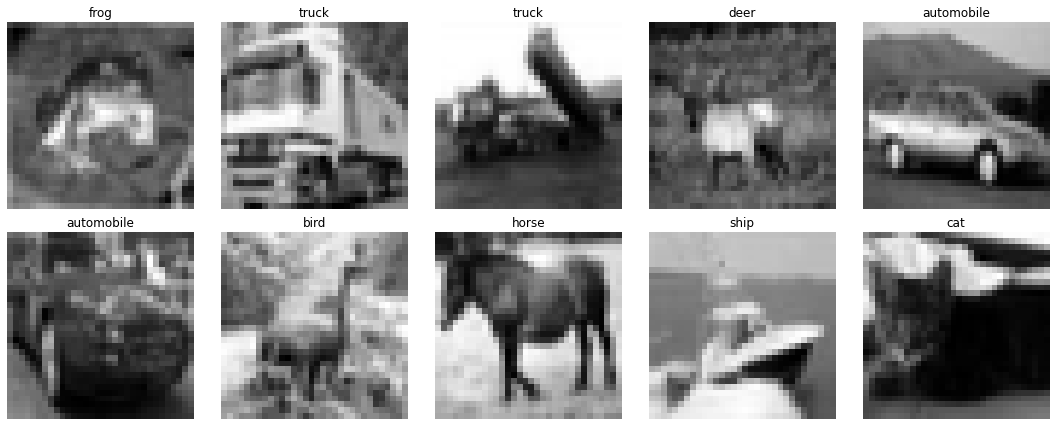

In [5]:
# Shapes
print("ENTRENAMIENTO\t\t", X_train_grey.shape,
      "\nNº de imágenes:\t\t", X_train_grey.shape[0],
      "\nTamaño:\t\t\t", X_train_grey.shape[1], "x", X_train_grey.shape[2], " píxeles")

print("\n\nTEST\t\t\t", X_test_grey.shape,
      "\nNº de imágenes:\t\t", X_test_grey.shape[0],
      "\nTamaño:\t\t\t", X_test_grey.shape[1], "x", X_test_grey.shape[2], " píxeles")

# Plot
fig, axis = plt.subplots(2, 5, figsize=(15, 6))
j=0
for i, ax in enumerate(axis):
    for a in ax:
        a.imshow(X_train_grey[j], cmap="gray")
        a.set_title(y_train_str[j])
        a.axis('off')
        j=j+1
plt.tight_layout()

El primer paso para entrenar una red neuronal consiste en pre-procesar los datos de entrenamiento y test para que cuadren con el formato esperado por las entradas y salidas de la red neuronal.

Empezaremos normalizando los datos de entrada para que estén en el rango [0,1] ya que, como podemos ver a continuación, se trata de valores enteros entre 0 y 255.

In [6]:
print("Los valores del primer registro de X_train_grey son: {}".format(X_train_grey[0]))

Los valores del primer registro de X_train_grey son: [[ 62  45  47 ... 128 121 120]
 [ 20   0   7 ...  82  77  82]
 [ 23   6  24 ...  78  78  68]
 ...
 [152 123 125 ... 117  27  32]
 [131 104 115 ... 136  58  51]
 [139 123 130 ... 174 112  90]]


In [7]:
# Determinar valores mínimo y máximo
v_min = np.min(X_train_grey)
v_max = np.max(X_train_grey)
print("Los valores mínimo y máximo son {} y {}.".format(v_min, v_max))

Los valores mínimo y máximo son 0 y 255.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Normalizar los datos de entrada a la red para que estén comprendidos en el rango [0,1]. Imprimir los datos del primer registro una vez se ha llevado a cabo la normalización y comprobar de nuevo los valores máximo y mínimo. 
</div>

In [8]:
# Dividir todos los valores entre el máximo valor posible (255) para normalizar los datos entre [0,1]
X_train_grey_n = X_train_grey/255
X_test_grey_n = X_test_grey/255

# Valores primer registro
print("Los valores del primer registro de X_train_grey_n son:\n\n{}".format(X_train_grey_n[0]))

# Determinar valores mínimo y máximo
v_min = np.min(X_train_grey_n)
v_max = np.max(X_train_grey_n)
print("\n\nLos valores mínimo y máximo son {} y {}.".format(v_min, v_max))

Los valores del primer registro de X_train_grey_n son:

[[0.24313725 0.17647059 0.18431373 ... 0.50196078 0.4745098  0.47058824]
 [0.07843137 0.         0.02745098 ... 0.32156863 0.30196078 0.32156863]
 [0.09019608 0.02352941 0.09411765 ... 0.30588235 0.30588235 0.26666667]
 ...
 [0.59607843 0.48235294 0.49019608 ... 0.45882353 0.10588235 0.1254902 ]
 [0.51372549 0.40784314 0.45098039 ... 0.53333333 0.22745098 0.2       ]
 [0.54509804 0.48235294 0.50980392 ... 0.68235294 0.43921569 0.35294118]]


Los valores mínimo y máximo son 0.0 y 1.0.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,25 pts.]:</strong> Codificar los valores de las etiquetas de salida en un vector one-hot. Por ejemplo, el vector de salida para una imagen que contiene un 5 sería: [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]. Comprobar el resultado imprimiendo su dimensión y mostrando algún registro.
</div>

**Nota**: Se puede utilizar la función `to_categorical` de `tensorflow.keras.utils`. 

In [9]:
# Generar vector one-hot para cada etiqueta
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

# Shape
print("ENTRENAMIENTO\t\t\t", y_train_oh.shape,
      "\nNº total de etiquetas:\t\t", y_train_oh.shape[0],
      "\nDimensión de cada etiqueta:\t", y_train_oh.shape[1])

print("\n\nTEST\t\t\t\t", y_test_oh.shape,
      "\nNº total de etiquetas:\t\t", y_test_oh.shape[0],
      "\nDimensión de cada etiqueta:\t", y_test_oh.shape[1])

# Valores primer registro
print("\n\nEl vector del primer registro de y_train_oh (", y_train[0][0], " = " , y_train_str[0], ") es:\n{}".format(y_train_oh[0]))
print("\n\nEl vector del primer registro de y_test_oh (", y_test[0][0], " = " , y_test_str[0], ") es:\n{}".format(y_test_oh[0]))

ENTRENAMIENTO			 (50000, 10) 
Nº total de etiquetas:		 50000 
Dimensión de cada etiqueta:	 10


TEST				 (10000, 10) 
Nº total de etiquetas:		 10000 
Dimensión de cada etiqueta:	 10


El vector del primer registro de y_train_oh ( 6  =  frog ) es:
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


El vector del primer registro de y_test_oh ( 3  =  cat ) es:
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## 2. Red Neuronal Artificial (ANN) completamente conectada [2,5 puntos]

A continuación implementaremos una red neuronal *feed-forward fully connected* y llevaremos a cabo el entrenamiento y test sobre el dataset CIFAR.

### 2.1 Pre-procesado de datos

Dado que en una red neuronal artificial las entradas son unidimensionales, lo primero que tenemos que hacer es redimensionar los datos de entrada (las imágenes) para convertirlos en arrays de una dimensión.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Modificar los conjuntos X_train_grey y X_test_grey para que sus registros sean arrays unidimensionales de dimensión 32x32 = 1024 datos. Comprobad el resultado imprimiendo las dimensiones de las variables.
</div>

In [10]:
# Reshape
X_train_gflat = X_train_grey_n.reshape(len(X_train_grey_n), 1024)
X_test_gflat = X_test_grey_n.reshape(len(X_test_grey_n), 1024)

# Shape
print("ENTRENAMIENTO\t\t", X_train_gflat.shape,
      "\nNº de registros:\t", X_train_gflat.shape[0],
      "\nNº de dimensiones:\t", X_train_gflat.shape[1])

print("\n\nTEST\t\t\t", X_test_gflat.shape,
      "\nNº de registros:\t", X_test_gflat.shape[0],
      "\nNº de dimensiones:\t", X_test_gflat.shape[1])

ENTRENAMIENTO		 (50000, 1024) 
Nº de registros:	 50000 
Nº de dimensiones:	 1024


TEST			 (10000, 1024) 
Nº de registros:	 10000 
Nº de dimensiones:	 1024


### 2.2 Creación del modelo


Vamos a usar un modelo `Sequential` de Keras 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [2 pts.]:</strong> Implementa el modelo de red neuronal artificial:
<ul>
<li>   Diseña la arquitectura para el modelo de clasificación con las siguientes características:</li>
   <ul>
   <li> 6 capas ocultas de 128 neuronas.</li>
   <li> 3 capas de Dropout del 20% (rate=0,2) intercaladas cada 2 capas densas. 
   <li> Función de activación de las capas intermedias: ReLU.</li>
   <li> 1 capa de salida con las dimensiones y función de activación adecuadas para realizar la clasificación.
   </ul>

<li>   Imprime el modelo para ver el número de parámetros a entrenar.

<li>   Compila el modelo con la función de pérdida más adecuada, el optimizador SGD, una velocidad de aprendizaje de 0.01, y la métrica Accuracy.</li>

<li>   Ajusta el modelo con 100 épocas y un tamaño del batch de 128. Mide el tiempo de entrenamiento.</li>

<li>   Muestra las gráficas de accuracy y loss. En cada gráfica debe visualizarse la curva de entrenamiento y la de validación. NOTA: Se recomienda hacer una función que imprima ambas gráficas para poder reutilizarla en próximos apartados.</li>
<li>   Realiza la evaluación del modelo para mostrar la pérdida y la precisión final. </li>
</ul>
</div>

In [11]:
# Crear el modelo ANN
ann = Sequential(name='ANN')

ann.add(Dense(128, input_dim=X_train_gflat.shape[1], activation='relu', name='h1'))
ann.add(Dense(128, activation='relu', name='h2'))
ann.add(Dropout(.2, name='d1'))
ann.add(Dense(128, activation='relu', name='h3'))
ann.add(Dense(128, activation='relu', name='h4'))
ann.add(Dropout(.2, name='d2'))
ann.add(Dense(128, activation='relu', name='h5'))
ann.add(Dense(128, activation='relu', name='h6'))
ann.add(Dropout(.2, name='d3'))

ann.add(Dense(y_train_oh.shape[1], activation='softmax', name='output'))

ann.summary()

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 128)               131200    
                                                                 
 h2 (Dense)                  (None, 128)               16512     
                                                                 
 d1 (Dropout)                (None, 128)               0         
                                                                 
 h3 (Dense)                  (None, 128)               16512     
                                                                 
 h4 (Dense)                  (None, 128)               16512     
                                                                 
 d2 (Dropout)                (None, 128)               0         
                                                                 
 h5 (Dense)                  (None, 128)               16512   

In [12]:
# Compile
ann.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=.01), metrics=['accuracy'])

In [13]:
# Entrenar el modelo
start = time.time()
annfit = ann.fit(X_train_gflat, y_train_oh, epochs=100 , batch_size=128, validation_data = (X_test_gflat, y_test_oh), verbose = 0)
end = time.time()
ann_time = end - start
print("Tiempo de entrenamiento: ", round(ann_time, 2), " segundos")

Tiempo de entrenamiento:  266.61  segundos


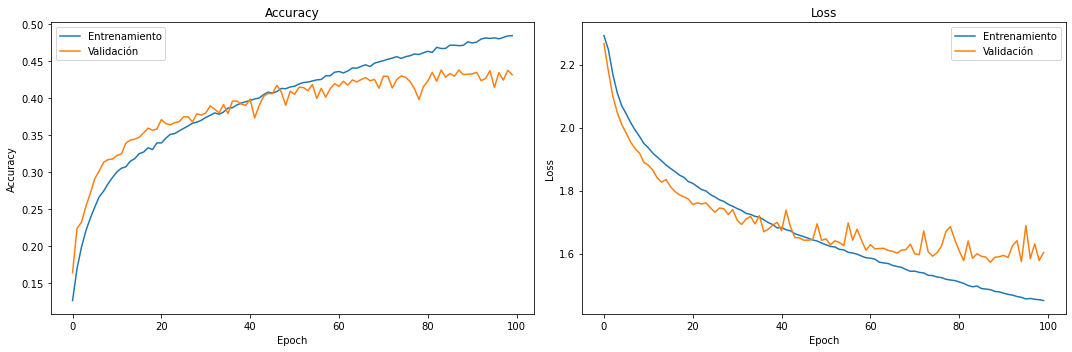

In [14]:
# Plot del training loss y el accuracy
def plot_prediction(mfit):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    
    ax[0].plot(mfit.history['accuracy'])
    ax[0].plot(mfit.history['val_accuracy'])
    ax[0].set_title('Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Entrenamiento', 'Validación'], loc='upper left')
    
    ax[1].plot(mfit.history['loss'])
    ax[1].plot(mfit.history['val_loss'])
    ax[1].set_title('Loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Entrenamiento', 'Validación'], loc='upper right')
    
    plt.tight_layout()

plot_prediction(annfit)

In [15]:
# Resultados
print('Accuracy:\t', round(annfit.history['val_accuracy'][-1], 4),
      '\nLoss:\t\t', round(annfit.history['val_loss'][-1], 4))

Accuracy:	 0.4316 
Loss:		 1.603


## 3. Red Neuronal Convolucional de una capa [2.5 puntos]

A continuación implementaremos una red neuronal convolucional de una capa y realizaremos el entrenamiento y test sobre el dataset CIFAR.

Se recomienda, a partir de este punto realizar el entrenamiento en una máquina con GPU (puede activarse en plataformas como Google Colab o Kaggle) con el fin de reducir los tiempos de entrenamiento.

### 3.1 Pre-procesado de datos

El primer paso para entrenar una red neuronal consiste en pre-procesar los datos de entrenamiento y test para que cuadren con las dimensiones de la entrada de la red neuronal.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Ajustar el tamaño de los datos de entrenamiento y test para que tengan 4 dimensiones (la última dimensión tiene que ser 1 para indicar que las imágenes están en escala de grises).
</div>

**Nota**: Utilizar el número de datos de entrenamiento y test y el tamaño de las imágenes.

In [16]:
# Reshape
X_train_grey_n_1 = X_train_grey_n.reshape(X_train_grey_n.shape[0], X_train_grey_n.shape[1], X_train_grey_n.shape[2], 1)
X_test_grey_n_1 = X_test_grey_n.reshape(X_test_grey_n.shape[0], X_test_grey_n.shape[1], X_test_grey_n.shape[2], 1)

print("ENTRENAMIENTO\t\t", X_train_grey_n_1.shape,
      "\nNº de imágenes:\t\t", X_train_grey_n_1.shape[0],
      "\nTamaño:\t\t\t", X_train_grey_n_1.shape[1], "x", X_train_grey_n_1.shape[2], " píxeles",
      "\nColores:\t\t", X_train_grey_n_1.shape[3])

print("\n\nTEST\t\t\t", X_test_grey_n_1.shape,
      "\nNº de imágenes:\t\t", X_test_grey_n_1.shape[0],
      "\nTamaño:\t\t\t", X_test_grey_n_1.shape[1], "x", X_test_grey_n_1.shape[2], " píxeles",
      "\nColores:\t\t", X_test_grey_n_1.shape[3])

ENTRENAMIENTO		 (50000, 32, 32, 1) 
Nº de imágenes:		 50000 
Tamaño:			 32 x 32  píxeles 
Colores:		 1


TEST			 (10000, 32, 32, 1) 
Nº de imágenes:		 10000 
Tamaño:			 32 x 32  píxeles 
Colores:		 1


### 3.2 Creación del modelo


Se quiere implementar un modelo secuencial de Keras con las siguientes características:

- La primera capa que añadiremos será una capa convolucional con las siguientes propiedades: 
    - Número de kernels (neuronas) de la primera capa oculta: 64 neuronas
    - Tamaño de los kernels: 3x3
    - Activación de los kernels: ReLU
- A continuación añadiremos una capa Flatten para conectar la salida de la capa convolucional con la entrada de una capa densa.
- Por último, añadiremos una capa densa de salida con el número de neuronas y función de activación adecuadas para llevar a cabo la clasificación.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [1,5 pts.]:</strong> Construir el modelo según los requerimientos indicados, además:
<ul>
<li>   Imprime el modelo para ver el número de parámetros a entrenar.

<li>   Compila el modelo con la función de pérdida más adecuada, el optimizador ADAM y la métrica Accuracy.</li>

<li>   Ajusta el modelo con 20 épocas y un tamaño del batch de 128. Mide el tiempo de entrenamiento.</li>

<li>   Muestra las gráficas de accuracy y loss. En cada gráfica debe visualizarse la curva de entrenamiento y la de validación</li>
<li>   Realiza la evaluación del modelo para mostrar la pérdida y la precisión final. </li>
</div>
</ul>

In [17]:
# Crear la CNN monocapa
gcnn = Sequential(name='GRAY_CNN')

gcnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=X_train_grey_n_1.shape[1:4], name='c1'))
gcnn.add(Flatten(name='f1'))

gcnn.add(Dense(y_train_oh.shape[1], activation='softmax', name='output'))

gcnn.summary()

Model: "GRAY_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 c1 (Conv2D)                 (None, 30, 30, 64)        640       
                                                                 
 f1 (Flatten)                (None, 57600)             0         
                                                                 
 output (Dense)              (None, 10)                576010    
                                                                 
Total params: 576,650
Trainable params: 576,650
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile
gcnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [19]:
# Entrenamiento del modelo
start = time.time()
gcnnfit = gcnn.fit(X_train_grey_n_1, y_train_oh, epochs=20, batch_size=128, validation_data = (X_test_grey_n_1, y_test_oh), verbose = 0)
end = time.time()
gcnn_time = end - start
print("Tiempo de entrenamiento: ", round(gcnn_time, 2), " segundos")

Tiempo de entrenamiento:  687.76  segundos


Accuracy:	 0.5781 
Loss:		 1.3201


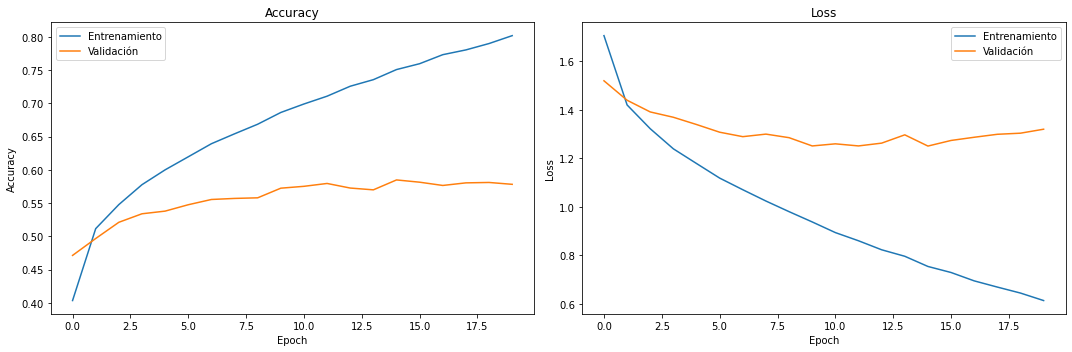

In [20]:
# Resultados
plot_prediction(gcnnfit)
print('Accuracy:\t', round(gcnnfit.history['val_accuracy'][-1], 4),
      '\nLoss:\t\t', round(gcnnfit.history['val_loss'][-1], 4))

### 3.3 GPU vs CPU


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Volver a entrenar el modelo desde cero en un entorno sin GPU (sólo con CPU) y compara los tiempos de entrenamiento. Comenta los resultados.
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong><br><br>

<font color=#679532>Todo este <i>Notebook</i> está siendo ejecutado en un entorno <b>sin <i>GPU</i></b>. Por lo tanto, todos tiempos de ejecución mostrados son resultado del entrenamiento de los modelos en CPU exclusivamente.<br>

<font color=#679532>Para realizar la comparativa, se ha realizado el entrenamiento de los modelos en un enterno externo con <i>GPU</i>, obteniendo los siguientes resultados:<br><br>

<font color=#679532>- Modelo <b><i>ANN</i></b>:<br>
<font color=#679532>&emsp;- Tiempo de entrenamiento <b>SIN <i>GPU</i></b>: <b><i>266.61</i></b> segundos<br>
<font color=#679532>&emsp;- Tiempo de entrenamiento <b>CON <i>GPU</i></b>: <b><i>139.88</i></b> segundos<br><br>
        
<font color=#679532>- Modelo <b><i>GRAY_CNN</i></b>:<br>
<font color=#679532>&emsp;- Tiempo de entrenamiento <b>SIN <i>GPU</i></b>: <b><i>687.76</i></b> segundos<br>
<font color=#679532>&emsp;- Tiempo de entrenamiento <b>CON <i>GPU</i></b>: <b><i>82.51</i></b> segundos<br>

</div>

## 4. Deep CNN con Maxpooling y Dropout [2 puntos]

En el ejercicio anterior hemos implementado una red convolucional de una sola capa. Ahora vamos a implementar una red neuronal convolucional profunda y veremos como esto se traduce en un mejor rendimiento en los resultados.

### 4.1 Creación del modelo


En este caso volveremos a utilizar el modelo `Sequential` de Keras que constará de: 
- Dos capas convolucionales de 32 kernels cada una de tamaño 3x3
- Una capa de MaxPooling con un tamaño de 2x2
- Una capa de Dropout con un rate=0.2
- Dos capas convolucionales de 64 kernels cada una de tamaño 3x3
- Una capa de MaxPooling con un tamaño de 2x2
- Una capa de Dropout con un rate=0.2
- Dos capas convolucionales de 128 kernels cada una de tamaño 3x3
- Una capa de MaxPooling con un tamaño de 2x2
- Una capa de Dropout con un rate=0.2
- Todas las capas convolucionales con función de activación ReLU y padding = same
- Una capa Flatten
- Una capa densa con 128 neuronas y función de activación ReLU
- Una capa de Dropout con un rate=0.2
- Una capa densa de salida con el número de neuronas y la función de activación necesarias para llevar a cabo la clasificación

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [1,5 pts.]:</strong> Construir el modelo según los requerimientos indicados, además:
<ul>
<li>   Imprime el modelo para ver el número de parámetros a entrenar.

<li>   Compila el modelo con la función de pérdida más adecuada, el optimizador SGD (con learning rate de 0.001 y momentum de 0.9) y la métrica Accuracy.</li>

<li>   Ajusta el modelo con 150 épocas y un tamaño del batch de 128. Mide el tiempo de entrenamiento.</li>

<li>   Muestra las gráficas de accuracy y loss. En cada gráfica debe visualizarse la curva de entrenamiento y la de validación</li>
<li>   Realiza la evaluación del modelo para mostrar la pérdida y la precisión final. </li>
</div>
</ul>
</div>

In [21]:
# Crear la CNN profunda
cnn = Sequential(name='CNN')

cnn.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train_grey_n_1.shape[1:4], name='c1'))
cnn.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='c2'))
cnn.add(MaxPooling2D((2, 2), name='mp1'))
cnn.add(Dropout(.2, name='do1'))
cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='c3'))
cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='c4'))
cnn.add(MaxPooling2D((2, 2), name='mp2'))
cnn.add(Dropout(.2, name='do2'))
cnn.add(Flatten(name='f1'))
cnn.add(Dense(128, activation='relu', name='h1'))
cnn.add(Dropout(.2, name='do3'))

cnn.add(Dense(y_train_oh.shape[1], activation='softmax', name='output'))

cnn.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 c1 (Conv2D)                 (None, 32, 32, 32)        320       
                                                                 
 c2 (Conv2D)                 (None, 32, 32, 32)        9248      
                                                                 
 mp1 (MaxPooling2D)          (None, 16, 16, 32)        0         
                                                                 
 do1 (Dropout)               (None, 16, 16, 32)        0         
                                                                 
 c3 (Conv2D)                 (None, 16, 16, 64)        18496     
                                                                 
 c4 (Conv2D)                 (None, 16, 16, 64)        36928     
                                                                 
 mp2 (MaxPooling2D)          (None, 8, 8, 64)          0       

In [22]:
# Compile
cnn.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=.001, momentum=.9), metrics=['accuracy'])

In [23]:
# Entrenamiento del modelo
start = time.time()
cnnfit = cnn.fit(X_train_grey_n_1, y_train_oh, epochs=150, batch_size=128, validation_data = (X_test_grey_n_1, y_test_oh), verbose = 0)
end = time.time()
cnn_time = end - start
print("Tiempo de entrenamiento: ", round(cnn_time, 2), " segundos")

Tiempo de entrenamiento:  31327.23  segundos


Accuracy:	 0.728 
Loss:		 0.9683


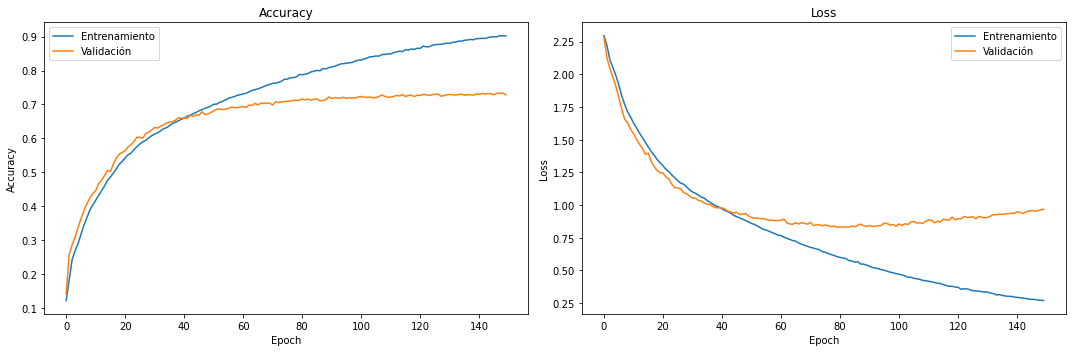

In [24]:
# Resultados
plot_prediction(cnnfit)
print('Accuracy:\t', round(cnnfit.history['val_accuracy'][-1], 4),
      '\nLoss:\t\t', round(cnnfit.history['val_loss'][-1], 4))

### 4.2 CNN con imágenes en color


Finalmente vamos a estudiar la influencia del color de las imágenes en la *performance* de la clasificación.

Para ello utilizaremos una red convolucional con la misma estructura de la red del apartado anterior pero cambiando la capa de entrada para que podamos introducir las imágenes originales en color, arrays de dimensión (32, 32, 3).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts]:</strong> Volver a realizar el ejercicio anterior pero modificando la capa de entrada para poder utilizar el conjunto de datos original, de tamaño (50000, 32, 32, 3) para el conjunto de train y (10000, 32, 32, 3) para el conjunto de test.

¿Influye el color de las imágenes en el resultado de la clasificación? Comentar el resultado.
</div>

**Nota**: Recordar normalizar las imágenes para que sus valores estén entre 0 y 1.

In [25]:
# Normalizar
X_train_n = X_train/255
X_test_n = X_test/255

# Determinar valores mínimo y máximo
v_min = np.min(X_train_n)
v_max = np.max(X_train_n)
print("Los valores mínimo y máximo son {} y {}.".format(v_min, v_max))

Los valores mínimo y máximo son 0.0 y 1.0.


In [26]:
# Crear la CNN profunda
ccnn = Sequential(name='COLOR_CNN')

ccnn.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train_n.shape[1:4], name='c1'))
ccnn.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='c2'))
ccnn.add(MaxPooling2D((2, 2), name='mp1'))
ccnn.add(Dropout(.2, name='do1'))
ccnn.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='c3'))
ccnn.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='c4'))
ccnn.add(MaxPooling2D((2, 2), name='mp2'))
ccnn.add(Dropout(.2, name='do2'))
ccnn.add(Flatten(name='f1'))
ccnn.add(Dense(128, activation='relu', name='h1'))
ccnn.add(Dropout(.2, name='do3'))

ccnn.add(Dense(y_train_oh.shape[1], activation='softmax', name='output'))

ccnn.summary()

Model: "COLOR_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 c1 (Conv2D)                 (None, 32, 32, 32)        896       
                                                                 
 c2 (Conv2D)                 (None, 32, 32, 32)        9248      
                                                                 
 mp1 (MaxPooling2D)          (None, 16, 16, 32)        0         
                                                                 
 do1 (Dropout)               (None, 16, 16, 32)        0         
                                                                 
 c3 (Conv2D)                 (None, 16, 16, 64)        18496     
                                                                 
 c4 (Conv2D)                 (None, 16, 16, 64)        36928     
                                                                 
 mp2 (MaxPooling2D)          (None, 8, 8, 64)          0 

In [27]:
# Compile
ccnn.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=.001, momentum=.9), metrics=['accuracy'])

In [28]:
# Entrenamiento del modelo
start = time.time()
ccnnfit = ccnn.fit(X_train_n, y_train_oh, epochs=150, batch_size=128, validation_data = (X_test_n, y_test_oh), verbose = 0)
end = time.time()
ccnn_time = end - start
print("Tiempo de entrenamiento: ", round(ccnn_time, 2), " segundos")

Tiempo de entrenamiento:  34302.66  segundos


Accuracy:	 0.7614 
Loss:		 0.8592


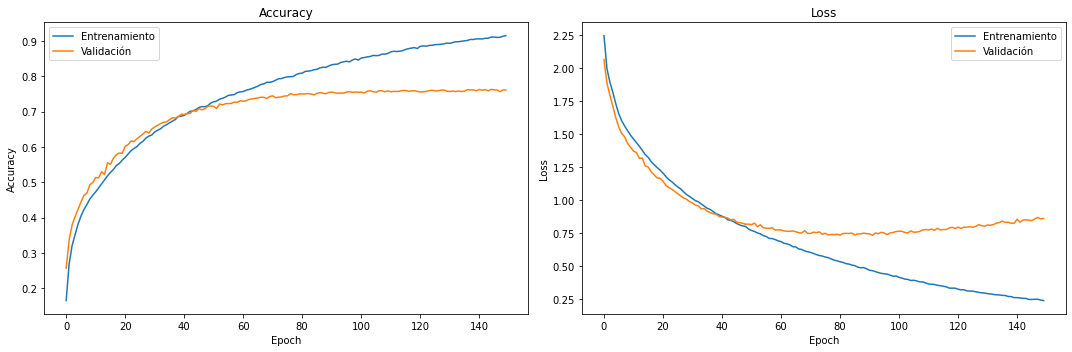

In [29]:
# Resultados
plot_prediction(ccnnfit)
print('Accuracy:\t', round(ccnnfit.history['val_accuracy'][-1], 4),
      '\nLoss:\t\t', round(ccnnfit.history['val_loss'][-1], 4))

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong><br><br>

<font color=#679532>Estos son los resultados de precisión y pérdida para la red preparada para las imágines en escala de grises y para las imágenes en color.<br><br>

<font color=#679532>- Modelo <b><i>CNN</i> GRIS</b>:<br>
<font color=#679532>&emsp;- <b><i>Accuracy</i></b>: <i>0.728</i><br>
<font color=#679532>&emsp;- <b><i>Loss</i></b>: <i>0.9683</i><br><br>
        
<font color=#679532>- Modelo <b><i>CNN</i> COLOR</b>:<br>
<font color=#679532>&emsp;- <b><i>Accuracy</i></b>: <i>0.7614</i><br>
<font color=#679532>&emsp;- <b><i>Loss</i></b>: <i>0.8592</i><br><br>

<font color=#679532>Se puede observar una pequeña mejora en la precisión del modelo con imágenes en color con respecto al modelo que utiliza las imágenes en escala de grises (<b><i>0.7614</i></b> frente a <b><i>0.728</i></b>). La mejora es aún más notable en la pérdida de ambos modelos, con <b><i>0.8592</i></b> de <i>loss</i> para el modelo con imágenes en color y <b><i>0.9683</i></b> para el modelo con imágenes en escala de grises.<br><br>

<font color=#679532>Sin embargo, ambos modelos presentan síntomas de <b>sobreentrenamiento</b>. Tal y como se pueden apreciar en las gráficas, con los datos de validación a partir del <i>epoch</i> 60-70 se estanca el <i>accuracy</i> y el <i>loss</i> comienza a aumentar mientras que, con los datos de entrenamiento, ambas medidas siempre mejoran. Esto deja entrever que, a partir de ese punto, el modelo se va adaptando cada vez mejor a los datos de entrenamiento en detrimento de la extrapolación de ese aprendizaje a datos totalmente nuevos.

</div>

## 5. Comparativa de los modelos implementados y predicción [1,5 puntos]

En este último apartado compararemos los modelos implementados y realizaremos la clasificación de algunas imágenes con el modelo que ha dado los mejores resultados.

### 5.1 Comparativa de los modelos implementados

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Realizar una comparativa de los modelos implementados comentando:

*   La precisión obtenida
*   La pérdida
*   El tiempo de entrenamiento
*   El número de parámetros a entrenar

Comentar los resultados obtenidos.

En base a los resultados obtenidos ¿Qué modelo seleccionaríais como el mejor?
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong><br><br>

<font color=#679532><b><i>ANN</i></b><br><br>

<font color=#679532>- <b>Precisión</b>: <b><i>0.4316</i></b>.<br> Muy deficiente. Las carencias de una red neuronal artificial para clasificar imágenes si aumentar exponencialmente la complejidad se traduce en un modelo poco efectivo.<br><br>
<font color=#679532>- <b>Pérdida</b>: <b><i>1.603</i></b>.<br> Demasiado alta para tener en consideranción los resultados del modelo.<br><br>
<font color=#679532>- <b>Tiempo de entrenamiento</b> con <b><i>100 epochs</i></b>: <b><i>266.61</i> segundos sin GPU</b> y <b><i>203.01</i> segundos con GPU</b>.<br> Un tiempo decente que se explica por la poca profundidad de la red, pero que aumentaría desproporcionalmene al aumentar el tamaño de ésta.<br><br>
<font color=#679532>- <b>Nº de parámetros a entrenar</b>: <b><i>215,050</i></b>.<br> Bastantes parámetros teniendo en cuenta los resultados, lo que muestra también la ineficiencia de las <i>ANN</i>s para este tipo de problemas de clasificación de imágenes.<br><br><br>

<font color=#679532><b><i>CNN</i> Monocapa</b><br><br>

<font color=#679532>- <b>Precisión</b>: <b><i>0.5781</i></b>.<br> Mejora el modelo base <i>ANN</i>, pero sigue sin ser una buena precisión. Una sola capa convolucional, pese a dar mejores resultados que la arquitectura <i>ANN</i> anterior, no es suficientemente eficaz.<br><br>
<font color=#679532>- <b>Pérdida</b>: <b><i>1.3201</i></b>.<br> Al igual que con la precisión, sigue siendo alta pese a mejorar al modelo base.<br><br>
<font color=#679532>- <b>Tiempo de entrenamiento</b> con <b><i>20 epochs</i></b>: <b><i>687.76</i> segundos sin GPU</b> y <b><i>96.54</i> segundos con GPU</b>.<br> Llama la atención el altísimo tiempo que lleva el entrenamiento del modelo solo con CPU, mientras que con GPU es entre 6 y 7 veces menor. La enorme capacidad de paralelizar las operaciones matriciales de gran tamaño de la GPU es perfecta para estas tareas de entrenamiento de redes convolucionales (están involucradas muchas multiplicaciones de matrices que se pueden realizar en paralelo), mientras que la CPU se ve obligada a operar secuencialmente gran parte de las matrices, lo que dispara el tiempo de entrenamiento.<br><br>
<font color=#679532>- <b>Nº de parámetros a entrenar</b>: <b><i>576,650</i></b>.<br> Pese a tener una sola capa, el número de parámetros entrenables es bastante alto. Esto se debe a la capa densa de salida, ya que debe <i>condensar</i> todas las dimensiones internas en tan solo <i>10</i> (por las dimensiones que tiene la salida).<br><br><br>

<font color=#679532><b><i>CNN</i> Profunda para imágenes en escala de grises</b><br><br>

<font color=#679532>- <b>Precisión</b>: <b><i>0.728</i></b>.<br> Se aprecia una mejora considerable con respecto al modelo monocapa. Pese a no ser un valor excelente, se puede considerar que el modelo tiene una buena capacidad de clasificar las imágenes en escala de grises.<br><br>
<font color=#679532>- <b>Pérdida</b>: <b><i>0.9683</i></b>.<br> Al igual que con la precisión, es un paso adelante con respecto a un modelo de una sola capa. Sin emargo, este valor da síntomas de sobreentrenamiento de la red si tenemos en cuenta la gráfica de pérdida del modelo, por lo que se podría mejorar acortando el entrenamiento.<br><br>
<font color=#679532>- <b>Tiempo de entrenamiento</b> con <b><i>150 epochs</i></b>: <b><i>31327.23</i> segundos sin GPU</b> y <b><i>1788.3</i> segundos con GPU</b>.<br> El tiempo con solo CPU es desorbitado (¡casi 9 horas!). Realizar todas las operaciones matriciales que implica el enytrenamiento de la red de forma secuencial hace que éste se dispare. Cuando hacemos uso de la capacidad de paralelizarlas que tiene la GPU, el tiempo disminuye drásticamente. Como veremos en el siguiente punto, llama la atención cómo, con tan solo 14'000 parámetros menos que el modelo CNN monocapa, el tiempo de entrenamiento es proporcionalmente mayor. Esto es debido a que, para entrenar los parámetros añadidos, no se pueden paralelizar las operaciones de matrices, ya que éstas correponden a distintas capas secuenciales, por lo que la entrada de una de estas operaciones sea la salida de una operación anterior. Esto lleva a que el pequeño incremento de oprecaciones matriciales que presenta este modelo con respecto al anterior implique operaciones en secuencia que la GPU no puede paralelizar.<br><br>
<font color=#679532>- <b>Nº de parámetros a entrenar</b>: <b><i>590,698</i></b>.<br> El incremento de capas apenas supone un incremento significativo de parámetros (auqnue sí sean significativos durante el proceso de entrenamiento por los motivos explicados en el punto anterior), ya que la gran mayoría de éstos se concentran en la primera capa <i>Dense</i>, que <i>condensa</i> todas las dimensiones internas en tan solo <i>10</i>.<br><br><br>

<font color=#679532><b><i>CNN</i> Profunda para imágenes en color</b><br><br>

<font color=#679532>- <b>Precisión</b>: <b><i>0.7614</i></b>.<br> Al añadir las dimensiones de color, la precisi´´on del modelo mejora con respecto al modelo que trabaja solo con escala de grises. Es una precisión buena, pero también refleja un sobreajuste a los datos de entrenamiento.<br><br>
<font color=#679532>- <b>Pérdida</b>: <b><i>0.8592</i></b>.<br> Mejora bastante con respecto al modelo anterior. Sin embargo, y como se puede ver con la precisión, los síntomas de sobreentrenamiento son evidentes. No obstante, al comparar la mejora de la pérdida y la mejora de la precisión (color vs. grises), se observa que ésta es mayor para la pérdida que para la precisión. Esto se debe a que, cuando la red se empieza a sobreentrenar, el <i>accuracy</i> se estanca mientras el <i>loss</i> aumenta para los datos de validación. Al ver que la pérdida mejora proporcionalmente más que la precisión de este modelo con respecto al anterior, podemos intuir que la tendencia al sobreentrenamiento del modelo mejora cuando añadimos las dimensiones de color.<br><br>
<font color=#679532>- <b>Tiempo de entrenamiento</b> con <b><i>150 epochs</i></b>: <b><i>34302.66</i> segundos sin GPU</b> y <b><i>1823.68</i> segundos con GPU</b>.<br> Proporcionalmente, el incremento es muy pequeño con respecto al modelo anterior, lo que muestra que las dimensiones extra que añaden el color a las imágenes no supone una complejidad extra significativa al modelo. Por lo demás, el tiempo con solo CPU es igualmente inmanejable (>9.5 horas).<br><br>
<font color=#679532>- <b>Nº de parámetros a entrenar</b>: <b><i>591,274</i></b>.<br> El incremento de parámetros con respecto al modelo sin colores no es significativo auqnue implique, proporcionalmente, algo más de tiempo de entrenamiento.<br><br>

</div>

<div class="alert alert-block alert-success">

<font color=#679532><b><i>MEJOR MODELO</i></b><br><br>

<font color=#679532>Teniendo en cuenta lo anterior, debemos descartar el modelo <b><i>ANN</i></b> y el modelo <b><i>CNN Monocapa</i></b> por sus bajas precisiones y altas pérdidas.<br><br>

<font color=#679532>Por lo tanto, los mejores modelos son las <b><i>CNN Profundas</i></b>. La diferencia en cuanto a parámetros y tiempo de entrenamiento no es significativa entre éstas, por lo que la mejor elección es la que introduce los <b>colores</b> de las imágenes como input, ya que muestra mejores resultado de precisión y pérdida. Aún así, se podría mejorar más únicamente reduciendo los <i>epochs</i> a 60 o 70, que es el punto a partir del cual los parámetros de la red empiezan a sobreajustarse a los datos de entrenamiento. De esta forma, se lograría disminuir la pérdida y reducir de forma muy significativa el tiempo de entrenamiento.

</div>

### 5.2 Análisis de la mejor solución

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Realizar un análisis de las medidas estadísticas más relevantes del modelo seleccionado en el apartado anterior y representar su matriz de confusión.

¿Qué clase es la que mejor se predice? ¿Y la que peor resultados obtiene?

Comentar los resultados
</div>

In [30]:
# Informe
y_pred_oh = ccnn.predict(X_test_n)
y_pred = [np.argmax(y, axis=None, out=None) for y in y_pred_oh]

tnames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(classification_report(y_test, y_pred, target_names = tnames))

              precision    recall  f1-score   support

    airplane       0.78      0.82      0.80      1000
  automobile       0.84      0.89      0.86      1000
        bird       0.72      0.63      0.67      1000
         cat       0.56      0.59      0.58      1000
        deer       0.73      0.71      0.72      1000
         dog       0.67      0.63      0.65      1000
        frog       0.82      0.83      0.83      1000
       horse       0.79      0.82      0.81      1000
        ship       0.85      0.86      0.86      1000
       truck       0.83      0.83      0.83      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



<div class="alert alert-block alert-success">
<strong>Respuesta:</strong><br><br>

<font color=#679532>En general, dada la arquitectura del modelo y los tipos de datos, la precisión global de <b><i>0.76</i></b>, aunque no llega a ser extraordinario, sí es bastante buena.<br>

<font color=#679532>La clase que mejor se predice es <b><i>automobile</i></b>, con una precisión de <b><i>0.84</i></b>, un <i>recall</i> de <b><i>0.89</i></b> y un <i>f1-score</i> de <b><i>0.86</i></b>.<br>

<font color=#679532>La clase que peor resultados obtiene es <b><i>cat</i></b>, con una precisión de <b><i>0.56</i></b>, un <i>recall</i> de <b><i>0.59</i></b> y un <i>f1-score</i> de <b><i>0.58</i></b>.

</div>

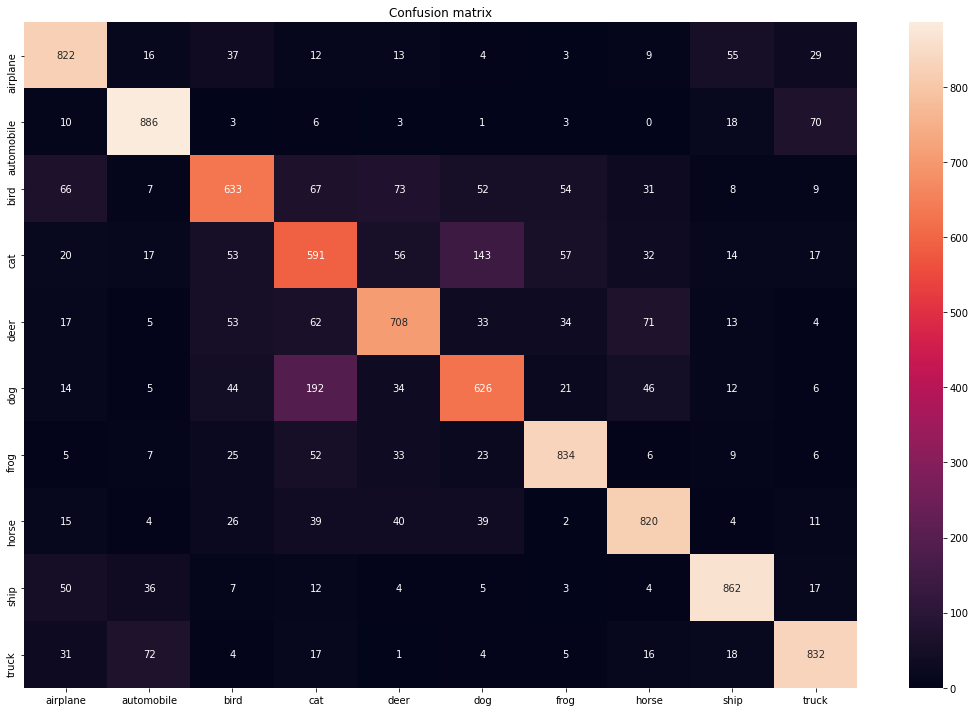

In [31]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (15,10))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g')
ax.set_xticklabels(tnames)
ax.set_yticklabels(tnames)
ax.set_title('Confusion matrix')
plt.tight_layout()

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong><br><br>

<font color=#679532>Visualizando la matriz de confusión, destaca la buena precisión del modelo, que logra clasificar la gran mayoría de las imágenes correctamente, cometiendo pocos errores. Cabe mencionar la dificultad de la red para diferenciar las imágenes de clase <b><i>cat</i></b> con las de clase <b><i>dog</i></b>, llgando a clasificar <b><i>192</i></b> imágenes de perros como gatos y <b><i>143</i></b> imágenes de gatos como perros (auqnue <b><i>626</i></b> imágenes de gatos y <b><i>591</i></b> de perros son clasificadas correctamente). Esto evidencia la dificultad de discernir entre imágenes de perros y de gatos dada la resolución de las mismas (<i>32</i> x <i>32</i> píxeles) y la similitud entre ambos animales.<br><br>

<font color=#679532>Por otro lado, también llama la atención el <b>bajo número de errores</b> de ciertas clasificaciones:<br>
<font color=#679532>- Ninguna imagen de <b><i>automobile</i></b> clasificada como <b><i>horse</i></b>.<br>
<font color=#679532>- Solo <b><i>1</i></b> imagen de <b><i>automobile</i></b> clasificada como <b><i>dog</i></b>.<br>
<font color=#679532>- Solo <b><i>1</i></b> imagen de <b><i>truck</i></b> clasificada como <b><i>deer</i></b>.<br>
<font color=#679532>- Solo <b><i>2</i></b> imágenes de <b><i>horse</i></b> clasificadas como <b><i>frog</i></b>.<br><br>

<font color=#679532>Esto también muestra la baja similitud que hay entre las imágenes de dichas clases, siendo muy difícil confundirlas entre sí.

</div>

### 5.3 Predicción de algunas imágenes del conjunto de test

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio [0,5 pts.]:</strong> Visualizar diez imágenes al azar del conjunto de test. Mostrar la etiqueta real y la predicción.
</div>

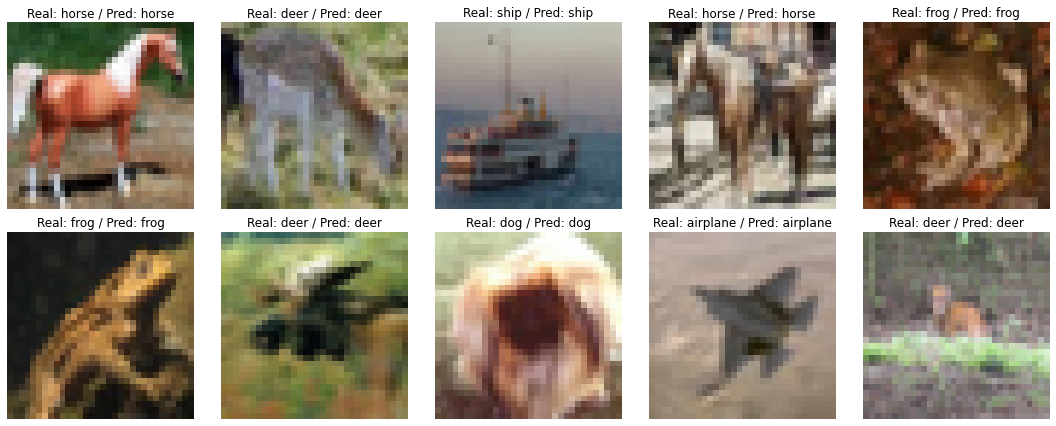

In [32]:
# Visualización
# Generar números aleatorios
import random
r = [random.randint(0, len(y_test)) for i in range(10)]

# Plot
fig, axis = plt.subplots(2, 5, figsize=(15, 6))
j=0
for i, ax in enumerate(axis):
    for a in ax:
        a.imshow(X_test[r[j]])
        a.set_title('Real: ' + tnames[y_test[r[j]][0]] + ' / Pred: ' + tnames[y_pred[r[j]]])
        a.axis('off')
        j=j+1
plt.tight_layout()